### Find Word Images Mask Fade

In [1]:
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import re
import glob
from pathlib import Path
import shutil
from os.path import isfile, join

In [2]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner
#lang_pair = "English"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> native language

In [3]:
word_lemma_all_data_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge"

path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-4-Find Word Images Mask Fade"

Path(path).mkdir(parents=True, exist_ok=True)

In [4]:
def word_group_dataframe(df, search_list, target_column, sample_num):
    '''
    word_group_dataframe(df_youtube_sentence, search_list, "sentence", 6)\n
    df_youtube_sentence is dataframe and "sentence" is its column for external searching_list
    ''' 
    df_search_result = pd.DataFrame()
    for j in search_list:
        df_select = df[df[f"{target_column}"].str.contains(fr"(?:\s|^){j}(?:\s|$)", na=False, regex=True)]
        #df_select.sort_values(f"{target_column}",key=lambda x:x.str.len(), inplace=True).head(sample_num)
        df_select = df_select.sort_values(f"{target_column}",key=lambda x:x.str.len()).head(sample_num)               
        df_select.insert(0,"search_string",j)
        df_search_result = pd.concat([df_search_result,df_select], axis=0)
    df_search_result.reset_index(inplace=True, drop=True)
    
    return df_search_result

In [5]:
def word_group_dataframe_all(df, search_list, target_column):
    '''
    word_group_dataframe(df_youtube_sentence, search_list, "sentence", 6)\n
    df_youtube_sentence is dataframe and "sentence" is its column for external searching_list
    ''' 
    df_search_result = pd.DataFrame()
    for j in search_list:
        df_select = df[df[f"{target_column}"].str.contains(fr"(?:\s|^){j}(?:\s|$)", na=False, regex=True)]
        #df_select.sort_values(f"{target_column}",key=lambda x:x.str.len(), inplace=True)
        df_select = df_select.sort_values(f"{target_column}",key=lambda x:x.str.len())
        df_select.insert(0,"search_string",j)
        df_search_result = pd.concat([df_search_result,df_select], axis=0)        
    df_search_result.reset_index(inplace=True, drop=True)
    
    return df_search_result

In [6]:
def take_dataframe_word_sample_from_sorting(df_source, word_list, word_source_column, sort_target_column, sort_ascending=True, sample_num=50):
    '''take_dataframe_word_sample_from_sorting(df_source, word_list, word_source_column, sort_target_column, sort_ascending=True, sample_num=50)\n
    df_source is a dataframe and word_list is equal in word_source_column. Then sort_target_column is sorting according to sort_ascending condition.\n
    Finally, taking sample_num each word_list values.\n 
    ex.\n
    take_dataframe_word_sample_from_sorting(df_genome_word_lemma_concat, word_list, "word", "search_text", sort_ascending=True, sample_num=50)
    '''
    df_search_result = pd.DataFrame()
    for word in word_list:
        df_select = df_source[df_source[f"{word_source_column}"] == word]
        df_select = df_select.sort_values(f"{sort_target_column}",key=lambda x:x.str.len(), ascending=sort_ascending).head(sample_num)
        df_search_result = pd.concat([df_search_result,df_select], axis=0)
    
    df_search_result.reset_index(inplace=True, drop=True)
    
    return df_search_result

In [7]:
def create_word_folder_and_copy_image(df_source, word_list, word_source_column, image_id_column, image_folder_path, output_path_folder):
    '''create_word_folder_and_copy_image(df_source, word_list, word_source_column, image_id_column, image_folder_path, output_path_folder)\n
    df_source is a dataframe and word_list is equal in word_source_column. Then word image id search in image_id_column and image copy to\n
    output_path_folder from image_folder_path.\n
    ex.\n
    image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Lemma Stem POS/Data/Visual Genome/images"\n
    output_path_folder = "/home/kurubal/Downloads/temp folder"\n
    create_word_folder_and_copy_image(df_sample_result, word_list, "word", "image_id", image_path, output_path_folder)
    '''
    df_search_result = pd.DataFrame()
    for word in word_list:
        path = f"{output_path_folder}/{word}"
        Path(path).mkdir(parents=True, exist_ok=True)        
        df_select = df_source[df_source[f"{word_source_column}"] == word]
        for image_id in df_select[f"{image_id_column}"]:
            image_file = glob.glob(f"{image_folder_path}/*/{image_id}.jpg")
            for l in image_file:
                source = l # source directory
                destination = path
                shutil.copy2(source, destination)

In [8]:
image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Lemma Stem POS/Data/Visual Genome/images"

In [9]:
image_folder_list = glob.glob(f"{image_path}/*")
image_folder_list

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2']

#### Visual Genome Word Lemma All Category Data

In [10]:
df_genome_word_lemma_all_category_concat = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge/Visual_Genome_Word_Lemma_All_Category_Concat_Result.xlsx")
df_genome_word_lemma_all_category_concat

,POS1,POS2,word,lemma.spacy,stem,word_en_translate,lemma_en_translate,frequency,object_id,names,...,x_koor,y_koor,attributes,sub_name,sub_object_id,questions,que_and_anw_id,answers,phrases,region_id
0,NUM,NaN,bir,bir,bir,a,a,18835735,4446407.0,a,...,126.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NUM,NaN,bir,bir,bir,a,a,18835735,3904298.0,a,...,150.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NUM,NaN,bir,bir,bir,a,a,18835735,3904300.0,a,...,182.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NUM,NaN,bir,bir,bir,a,a,18835735,3902259.0,a,...,142.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NUM,NaN,bir,bir,bir,a,a,18835735,3902256.0,a,...,0.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197129,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,267.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,airport check in kiosks,4492506.0
197130,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,17.0,459.0,NaN,NaN,NaN,NaN,NaN,NaN,red check of tablecloth,726657.0
197131,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,301.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,a check is on the table,1814370.0
197132,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,NaN,...,405.0,194.0,NaN,NaN,NaN,NaN,NaN,NaN,cleats with white check,2132765.0


In [12]:
df_genome_word_lemma_all_category_concat_num = df_genome_word_lemma_all_category_concat.reset_index(names="num")
df_genome_word_lemma_all_category_concat_num

,num,POS1,POS2,word,lemma.spacy,stem,word_en_translate,lemma_en_translate,frequency,object_id,...,x_koor,y_koor,attributes,sub_name,sub_object_id,questions,que_and_anw_id,answers,phrases,region_id
0,0,NUM,NaN,bir,bir,bir,a,a,18835735,4446407.0,...,126.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NUM,NaN,bir,bir,bir,a,a,18835735,3904298.0,...,150.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NUM,NaN,bir,bir,bir,a,a,18835735,3904300.0,...,182.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NUM,NaN,bir,bir,bir,a,a,18835735,3902259.0,...,142.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NUM,NaN,bir,bir,bir,a,a,18835735,3902256.0,...,0.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197129,197129,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,267.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,airport check in kiosks,4492506.0
197130,197130,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,17.0,459.0,NaN,NaN,NaN,NaN,NaN,NaN,red check of tablecloth,726657.0
197131,197131,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,301.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,a check is on the table,1814370.0
197132,197132,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,405.0,194.0,NaN,NaN,NaN,NaN,NaN,NaN,cleats with white check,2132765.0


In [15]:
df_genome_word_lemma_all_category_concat_num_dropna = df_genome_word_lemma_all_category_concat_num.dropna(subset=["height","width","x_koor","y_koor"])
df_genome_word_lemma_all_category_concat_num_dropna = df_genome_word_lemma_all_category_concat_num_dropna[["num","word","lemma.spacy","stem","word_en_translate","image_id","height","width","x_koor","y_koor"]]
df_genome_word_lemma_all_category_concat_num_dropna

,num,word,lemma.spacy,stem,word_en_translate,image_id,height,width,x_koor,y_koor
0,0,bir,bir,bir,a,2390994,29.0,20.0,126.0,305.0
1,1,bir,bir,bir,a,2348965,129.0,190.0,150.0,113.0
2,2,bir,bir,bir,a,2348965,123.0,317.0,182.0,233.0
3,3,bir,bir,bir,a,2349861,46.0,15.0,142.0,168.0
4,4,bir,bir,bir,a,2349866,54.0,188.0,0.0,97.0
...,...,...,...,...,...,...,...,...,...,...
197129,197129,çekilin,çek,çek,withdraw,2317616,27.0,60.0,267.0,37.0
197130,197130,çekilin,çek,çek,withdraw,2400604,37.0,65.0,17.0,459.0
197131,197131,çekilin,çek,çek,withdraw,2386272,95.0,132.0,301.0,236.0
197132,197132,çekilin,çek,çek,withdraw,2371210,22.0,11.0,405.0,194.0


In [17]:
df_genome_word_lemma_all_category_concat_num_dropna.sort_values(by=["height","width"], ascending=False)

,num,word,lemma.spacy,stem,word_en_translate,image_id,height,width,x_koor,y_koor,x_height,y_width
34868,34868,içinde,iç,iç,inside,498200,998.0,635.0,30.0,17.0,968.0,618.0
35167,35167,içeri,içeri,iç,inside,498200,998.0,635.0,30.0,17.0,968.0,618.0
107780,107780,yaşıyor,yaşa,yaş,living,713302,937.0,1268.0,10.0,12.0,927.0,1256.0
22700,22700,yardım,yardım,yardım,help,285821,900.0,175.0,0.0,92.0,900.0,83.0
107056,107056,parti,parti,parti,party,1592034,895.0,664.0,58.0,101.0,837.0,563.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89136,89136,aşağı,aşağı,aşağı,down,2413184,1.0,1.0,192.0,242.0,-191.0,-241.0
91868,91868,yukarı,yukarı,yukarı,above,2411701,1.0,1.0,298.0,58.0,-297.0,-57.0
92129,92129,üstünde,üst,üst,above,2411701,1.0,1.0,298.0,58.0,-297.0,-57.0
102974,102974,kırmızı,kırmızı,kırmızı,red,2396771,1.0,1.0,324.0,126.0,-323.0,-125.0


In [11]:
#df_genome_word_lemma_all_category_concat[df_genome_word_lemma_all_category_concat["image_id"] == 2383389]

In [19]:
result_list = []
def image_id_koor_path(df,image_id_column,image_id,image_path,image_path_addition="*",xheight="height",ywidth="width",xkoor="x_koor",ykoor="y_koor"):
    df_dropna = df.dropna(subset=[f'{xheight}',f'{ywidth}',f'{xkoor}',f'{ykoor}'])
    df_var = df_dropna[df_dropna[f"{image_id_column}"] == image_id].head(1)
    height = int(df_var.loc[:,f"{xheight}"])
    width = int(df_var.loc[:,f"{ywidth}"])
    x_koor = int(df_var.loc[:,f"{xkoor}"])
    y_koor = int(df_var.loc[:,f"{ykoor}"])
    image_path_result = glob.glob(f"{image_path}/{image_path_addition}/{image_id}.jpg")[0]    
    result_list.append(height)             # 0
    result_list.append(width)              # 1
    result_list.append(x_koor)             # 2
    result_list.append(y_koor)             # 3
    result_list.append(image_path_result)  # 4    
    
    return result_list # print(f"height:{height} \nwidth:{width} \nx_koor:{x_koor} \ny_koor:{y_koor} \nimage_path_result:{image_path_result}")

#### Parameter

In [126]:
image_id = 2383389
result_list = []
image_id_koor_path(df_genome_word_lemma_all_category_concat,"image_id",image_id,image_path)

[137,
 170,
 234,
 134,
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2/2383389.jpg']

In [127]:
df_genome_word_lemma_all_category_concat[df_genome_word_lemma_all_category_concat["image_id"] == image_id].head(1).transpose()

,374
POS1,PRON
POS2,NaN
word,bu
lemma.spacy,bu
stem,bu
word_en_translate,this
lemma_en_translate,this
frequency,11062659
object_id,1321213.0
names,"scissors , red-handled scissors"


In [128]:
height = result_list[0]
width = result_list[1]
x_koor = result_list[2]
y_koor = result_list[3]

##### Open CV Matplotlib

True

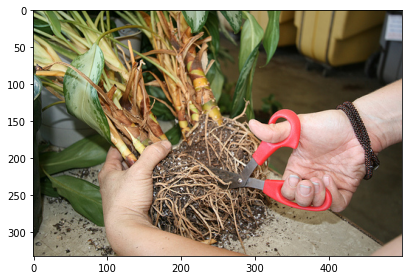

In [129]:
img = cv2.imread(f"{result_list[4]}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
cv2.imwrite(f'{image_id}.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

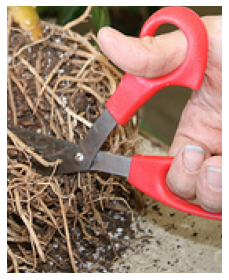

In [130]:
fig, ax = plt.subplots()
ax.imshow(img)
#plt.xlim(x_koor, x_koor+width)
#plt.ylim(y_koor, y_koor+height)
plt.ylim(y_koor+width,y_koor)
plt.xlim(x_koor,x_koor+height)
#plt.grid(False)
plt.axis('off')
plt.savefig(f'{image_id}_masked2.jpg',bbox_inches = "tight",pad_inches=0)
plt.show()

##### Pillow Matplotlib

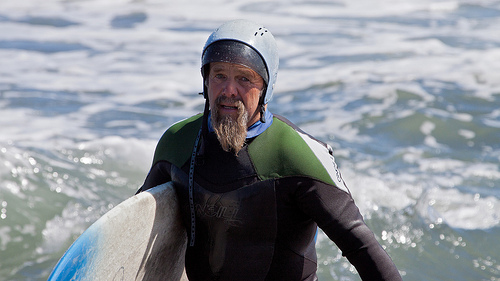

In [119]:
img = Image.open(f"{result_list[4]}") # 2383389.jpg, 2390994.jpg
img

In [120]:
img_width, img_height = img.size

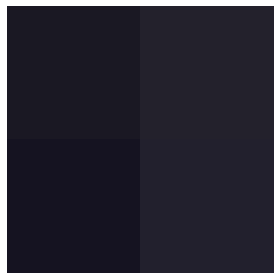

In [121]:
fig, ax = plt.subplots()
ax.imshow(img)
plt.rcParams["figure.autolayout"] = True
plt.ylim(y_koor+width,y_koor)
plt.xlim(x_koor,x_koor+height)
plt.grid(False)
plt.axis('off')
#plt.savefig(f'{image_id}_masked.jpg',bbox_inches = "tight",pad_inches=0)
plt.show()

##### Open CV And Open CV

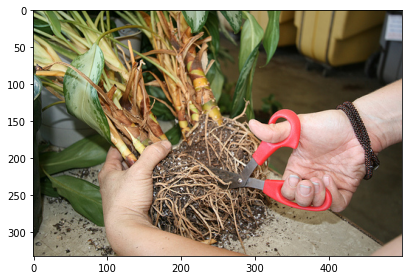

In [131]:
image = cv2.imread(f"{result_list[4]}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept

In [132]:
image.shape[:2]

(333, 500)

In [133]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (x_koor, y_koor), (x_koor+height, y_koor+width), 255, -1)
#cv2.imshow("Rectangular Mask", mask)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)

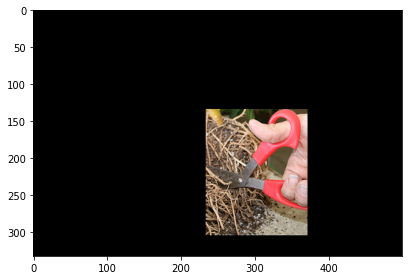

In [134]:
plt.imshow(masked)

In [48]:
cv2.imwrite(f'{image_id}_masked.jpg', cv2.cvtColor(masked, cv2.COLOR_RGB2BGR))

True

In [135]:
img = cv2.imread(f"{result_list[4]}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

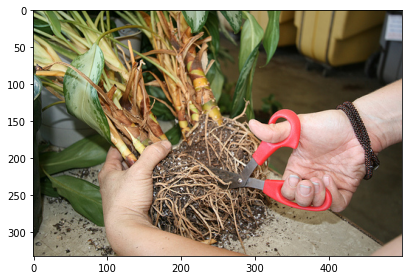

In [136]:
plt.imshow(img)

In [137]:
#avging = cv2.blur(img,(10,10))
blurred_img = cv2.GaussianBlur(img, (21, 21), 0)

In [138]:
mask = np.zeros(img.shape[:2], dtype="uint8")
mask = cv2.rectangle(mask, (x_koor, y_koor), (x_koor+height, y_koor+width), 255, -1)

In [139]:
out = np.where(mask==np.array([255, 255, 255]), img, blurred_img)

<ipython-input-139-b74da2cb5628>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  out = np.where(mask==np.array([255, 255, 255]), img, blurred_img)


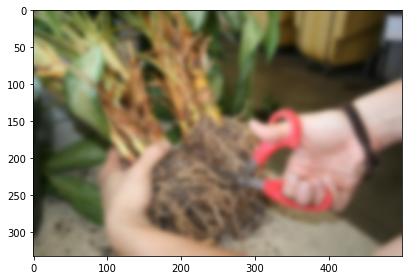

In [140]:
plt.imshow(out)

##### Padding

In [43]:
# read image
img = cv2.imread(f'{image_id}_masked.jpg')
old_image_height, old_image_width, channels = img.shape

# create new image of desired size and color (blue) for padding
#if old_image_height < old_image_width:

aspect_ratio_width = 16
aspect_ratio_height = 9

if old_image_height > old_image_width:
       new_image_width = int((old_image_height/aspect_ratio_height)*aspect_ratio_width)
       new_image_height = int(old_image_height)
elif old_image_height < old_image_width:
       new_image_width = int(old_image_width)
       new_image_height = int((old_image_width/aspect_ratio_width)*aspect_ratio_height)
else:
       new_image_width = old_image_width
       new_image_height = old_image_height
       
#new_image_width = 1600
#new_image_height = 900
color = (0,0,0)
result = np.full((new_image_height,new_image_width, channels), color, dtype=np.uint8)

# compute center offset
x_center = (new_image_width - old_image_width) // 2
y_center = (new_image_height - old_image_height) // 2

# copy img image into center of result image
result[y_center:y_center+old_image_height, 
       x_center:x_center+old_image_width] = img

# view result
#cv2.imshow("result", result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# save result
cv2.imwrite(f'{image_id}_masked_padded.jpg', result)

True

#### Copy Move And Delete

In [44]:
output_file = glob.glob(f"")
output_file

[]

In [45]:
for l in output_file:
    source = l # source directory
    destination = path
    shutil.copy2(source, destination)

In [46]:
for j in output_file:
    try:
        os.remove(j)
    except:
        pass